# IMPORT PACKAGES

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
import seaborn as sns
import os
import hdbscan
%matplotlib inline

from sentence_transformers import SentenceTransformer
from fuzzywuzzy import process, fuzz

C:\Users\t-sadash\Anaconda3\envs\muse\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# READ DATA

In [32]:
df = pd.read_json("./data/caanrc_misinformation_tweets.json")

In [33]:
df.head()

,screen_name,party,created_at,id_str,full_text,hashtags,retweet_count,retweet_handle
167,1Patelzuber,INC,2020-01-22 08:00:40,1219892623948709888,aap amp bjp ally akali dal both walked out of ...,[],50,geetv79
683,abhbasak,BJP,2020-01-02 08:23:38,1212650643950899200,here it is nexus of subversion between mamatao...,[PFI],20,anirbanganguly
684,abhbasak,BJP,2020-01-02 10:26:03,1212681451176636416,i urge friends from the media to question pfi ...,[],3,sevakaroon
706,abhbasak,BJP,2020-01-05 15:36:52,1213846835560759296,pfi simi sdpi have engineered violence during ...,"[PFI, SIMI, SDPI, CAA]",8,anirbanganguly
740,abhbasak,BJP,2020-01-13 12:39:26,1216701287414128640,on way towards nabadvip took a detour amp visi...,"[Nabadvip, Beldanga]",9,anirbanganguly


In [34]:
df.shape[0]

17463

In [35]:
df = df.drop_duplicates(subset='full_text')

In [36]:
df.shape

(7618, 8)

In [19]:
def fuzzy_matching(x, matches):
    match = process.extractBests(x, df['full_text'].tolist(), scorer=fuzz.token_sort_ratio,
               score_cutoff = 80)
    print(len(match))
    matches.append(match)

In [20]:
matches = []
df['full_text'].apply(lambda x: fuzzy_matching(x,matches))

2
1
1
1
1
1
1
1
1
1
1
3
2
1
1
4
5
1
1
3
2
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
4
4
4
4
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
2
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
2
1
1
2
3
2
1
1
1
1
2
2
1
1
1
2
4
1
1
1
2
1
5
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
2
1
2
1
1
3
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
2
2
4
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
3
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
2
5
3
3
4
1
1
1
1
4
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
2
1
1
1
1
1
1
1
1
1
3
1
5
5
3
1
1
1
4
1
1
1
1
1
1
3
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
3
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
5
2
3
5
1
1
2
1
1
1
1
1
1
1
1
2
1
5
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
2
4
1
1
2
1
1
2
1
1
1
1
1
3
3
3
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
4
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
2
1
1
1
1
1
1
3
3
3
1
1
1
1
1
1
1
1
3
2
1
1
4
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
2
3
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
4
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
2
1
1
1
1
5
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
5
5
5
5
1
1
1
1
1
5
1
1
1
5
5
5
5
2
1
1
4
5
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
2
1
4
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
3
1
2
1
1
1
2
2
1
1
2
1
1
1
1
1
1
1
3
1
1
1
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
3
3
2
2
1
2


167        None
683        None
684        None
706        None
740        None
           ... 
1147204    None
1147205    None
1147208    None
1147232    None
1147340    None
Name: full_text, Length: 7618, dtype: object

In [120]:
import pickle

with open ('caanrc_fuzzy_matches', 'wb') as f:
    pickle.dump(matches,f)

In [39]:
for match in matches:
    if len(match) > 1:
        print(match)
        for i in range(1,len(match)):
            df.drop(df[df['full_text'] == match[i][0]].index, inplace = True)
        print("Deleted {} Rows".format(len(match)-1))

[('aap amp bjp ally akali dal both walked out of punjab assembly when a resolution against caa was passed after voting with bjprss on art 370 amp dismemberment of kashmir under presidents rule aap again sides with bjprss on caa aapisbjp aapdhokebaazhai  ', 100), ('aap amp bjp ally akali dal both walked out of punjab assembly when a resolution against caa was passed after voting with bjprss on art 370 amp dismemberment of kashmir under presidents rule aap again sides with bjprss on caa aapisbjp aapdhokebaazhai ', 100)]
Deleted 1 Rows
[('congress trying to instigate students and using them as pawns to further their petty political interests on the name of citizenship amendment act congresssponsoredviolence ', 100), ('congress trying to instigate students and using them as pawns to further their petty political interests on the name of citizenship amendment act congresssponsoredviolence sunilambekarm ashishsainram', 92), ('congress trying to instigate students and using them as pawns to f

Deleted 1 Rows
[('pfi has emerged as the unifying thread for organising violent protests against caa ', 100), ('pfi has emerged as the unifying thread for organising violent protests against caa  via swarajyamag', 91)]
Deleted 1 Rows
[('shaheenbaghsham  bjp sting video claims shaheen bagh protest congresssponsored people getting rs 500day ', 100), ('protestonhire  bjp sting video claims shaheen bagh protest congresssponsored people getting rs 500day ', 85)]
Deleted 1 Rows
[('up police arrest 3 pfi members from lucknow 5 from kanpur for anticaa riots ', 100), ('up police arrest 3 pfi members from lucknow 5 from kanpur for anticaa riots  ', 100)]
Deleted 1 Rows
[('150 members of radical islamist outfit pfi entered delhi hid in jamia area 2 days before anticaa riots police on jamia millia islamia riots ', 100), ('150 members of radical islamist outfit pfi entered delhi hid in jamia area 2 days before anticaa riots police on jamiaprotest ', 89), ('150 members of radical islamist outfit pfi

[('anti caa protests are not organic pfi and sdpi are involved in anti caa violence gazvaahind agenda behind anti caaanti hindu riots jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 100), ('anti caa protests are not organic  pfi and sdpi are involved in anti caa violence  gazvaahind agenda behind anti caa anti hindu riots  jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 98), ('anti caa protests are not organic  pfi and sdpi are involved in anti caa violence  jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 88)]
Deleted 2 Rows
[('simi pfi behind caa violence intel reveals ', 100), ('simi pfi behind caa violence intel  ', 89), ('no shocker simi pfi behind caa violence intel reveals ', 88), ('big revelation  simi pfi behind caa violence intel reveals ', 85)]
Deleted 3 Rows
[('sudhirchaudhary well done sudhir and deepak you tried your

Deleted 4 Rows
[('anti caa protests are not organic  pfi and sdpi are involved in anti caa violence  jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 100), ('anti caa protests are not organic  pfi and sdpi are involved in anti caa violence  gazvaahind agenda behind anti caa anti hindu riots  jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 82)]
Deleted 1 Rows
[('ed fails bjp in delhi as its expos linking muslim outfit pfi to shaheen bagh collapses theprints ananya bhardwaj bhardwajananya reports ', 100), ('ed fails bjp in delhi as its expos linking muslim outfit pfi to shaheen bagh bombs theprints ananya bhardwaj bhardwajananya reports ', 96)]
Deleted 1 Rows
[('uttar pradesh dgp op singh writes letter to ministry of home affairs requesting to impose a ban on popular front of india pfi as investigations found pfis involvement in the violent protests against citizenshipamendmentact tha

Deleted 1 Rows
[('big question do these dired papers expose the pfitukde lobby link in organising anticaa agitation tweet your view with tukdefundedcaastir ', 100), ('dired big question to the pfi do these dired papers expose the pfitukde lobby link in organising anticaa agitation tweet your views with tukdefundedcaastir ', 94)]
Deleted 1 Rows
[('bjps kapilmishraind whos video of instigating crowds to violence in north east delhi during anticaa protests is in public domain nowhe is trending tahirhussainterrorist everyone knows both of them were good friends          milligazette ', 100), ('bjps kapilmishraind whos video of instigating crowds to violence in north east delhi during anticaa protests is in public domain now he is trending tahirhussainterrorist everyone knows both of them were good friends then kapil left aamaadmiparty ', 80)]
Deleted 1 Rows
[('shaheen bagh is a horror film that continues to be played even though it has flopped badly my views on timesnow with navikakumar sh

Deleted 1 Rows
[('banpfi involving in  lovejihad  anti  caa violence  forceful conversions  anti  national activities  bangalore and delhi riots  killing of hindu leaders we urge hmoindia to impose total ban on pfi with no delay ', 100), ('banpfi pfi involving in  lovejihad  anti  caa violence  forceful conversions  anti  national activities  bangalore and delhi riots  killing of hindu leaders we urge hmoindia to impose total ban on pfi with no delay pfiexposed', 96)]
Deleted 1 Rows
[('so the man behind shaheen bagh shooting is aap worker aapburnsdelhi aapketerrorists ', 100), ('so the man behind shaheen bagh shooting is aap worker aapketerrorists ', 91)]
Deleted 1 Rows
[('savedelhihindus the goons are provoked by congress aap and intellectual terrorists under the deliberate misinformation on caa now the property of hindus being destroyed and they are being butchered now who will bear responsibility of loss', 100), ('the goons are provoked by congress aap and intellectual terrorists un

Deleted 2 Rows
[('how many resident indians lost their citizenships due to the caa swara  she helped too incite delhi rits in jafrabad dear delhi police arrestswarabhaskar ', 100), ('how many resident indians lost their citizenships due to the caa swara  she helped too incite delhi rits in jafrabad dear delhi police arrestswarabhaskar', 100), ('how many resident indians lost their citizenships due to the caa reallyswara arrestswarabhaskar she helped too incite delhi riots in jafrabad that claimed lives of 50 innocent people ', 82)]
Deleted 2 Rows
[('congress trying to instigate students and using them as pawns to further their petty political interests on the name of citizenship amendment act shriniwashr nidhitripathi92 abvpvoice congresssponsoredviolence ', 100), ('congress trying to instigate students and using them as pawns to further their petty political interests on the name of citizenship amendment act congresssponsoredviolence ', 90), ('congress trying to instigate students and

Deleted 2 Rows
[('meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots join rahul shivshankar on india upfront tonight at 8 pm  tweet with caapfilinktapes ', 100), ('meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots tune in to times now with rahul shivshankar on india upfront  tweet with caapfilinktapes ', 89), ('caapfilinktapes  meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots times nows vivek narayan with details  india upfront with rahul shivshankar ', 83), ('meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots join navika kumar on thenewshour tonight at 9 pm  tweet with caapfilinktapes ', 82)]
Deleted 3 Rows
[('meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots tune in to times now with rahul shivshankar on india upfront  tweet with caapfilinktapes ', 100), ('meerutpolice release video tapes on antica

Deleted 1 Rows
[('the dired has unearthed a link between pfi and protests against caa2019 that have been raging on across india heres more  your take  caanrcnpr caaprotests ', 100), ('dired unearths a link between pfi and caaprotests that have been raging on across india  your take   caanrcnpr caa2019 caanrc ', 83)]
Deleted 1 Rows
[('dired unearths a link between pfi and caaprotests that have been raging on across india  your take   caanrcnpr caa2019 caanrc ', 100), ('the dired has unearthed a link between pfi and protests against caa2019 that have been raging on across india heres more  your take  caanrcnpr caaprotests ', 83)]
Deleted 1 Rows
[('the uttarpradeshpolice have arrested five members of the popular front of india pfi on charges of instigating violence against the citizenship amendment act caa and the national register of citizens nrc in kanpur ', 100), ('police have arrested 5 members of the popular front of india pfi on charges of instigating violence against citizenship am

Deleted 4 Rows
[('times now accesses pictures depicting shaheen gun man with aamaadmipartys top leadership aap pledges desh bhakti lessons but plots shaheen bagh saazish has pms prayog taunt been vindicated watch rahul shivshankar on india upfront at 8 pm  aapshaheengunmanlink ', 100), ('times now accesses pictures depicting shaheen gunman with aamaadmipartys top leadership aap pledges desh bhakti lessons but plots shaheen bagh saazish has pms prayog taunt been vindicated watch rahul shivshankar on india upfront at 8 pm  aapshaheengunmanlink ', 87)]
Deleted 1 Rows
[('times now is the only channel with visual proof which shows shaheen gunman has aamaadmiparty links join rahul shivshankar on india upfront tonight at 8 pm  tweet with aapshaheengunmanlink ', 100), ('times now is the only channel with visual proof which shows shaheen gun man has aamaadmiparty links join rahul shivshankar on india upfront tonight at 8 pm  tweet with aapshaheengunmanlink ', 98), ('times now is the only channe

Deleted 1 Rows
[('shaheenbaghscam  nobody on this panel looks anything about this shaheen bagh ive been living in this vicinity dr tasleem ahmed rehmani president of muslim political council of india amp leader sdpi ', 100), ('shaheenbaghscam  nobody on this panel looks anything about this shaheen bagh ive been living in this vicinity dr tasleem ahmed rehmani president of muslim political council of india amp leader sdpi  ', 100)]
Deleted 1 Rows
[('shaheenbaghscam  nobody on this panel looks anything about this shaheen bagh ive been living in this vicinity dr tasleem ahmed rehmani president of muslim political council of india amp leader sdpi ', 100), ('shaheenbaghscam  nobody on this panel looks anything about this shaheen bagh ive been living in this vicinity dr tasleem ahmed rehmani president of muslim political council of india amp leader sdpi  ', 100)]
Deleted 1 Rows
[('massive crackdown on pfi over anticaa violence ed raids 26 locations countrywide ', 100), ('pficrackdown  massiv

Deleted 2 Rows
[('uttar pradesh police sought a ban on the pfi suspecting the organisations complicity in the statewide violent protests against the caa ', 100), ('in december 2019 uttarpradesh police sought a ban on pfi suspecting the organisations complicity in the statewide protests against caa ', 83)]
Deleted 1 Rows
[('up seeks ban on pfi for anticaa violence ', 100), ('up seeks ban on pfi for anticaa violence  via economictimes', 82)]
Deleted 1 Rows
[('barkhatrehan16 victoriousnamo shaheenbagh payment structure 0600  1400 shiftgt 700 1400  2200 shiftgt500 2200  0600 shiftgt 1000 foodsnacksteawater free daily cost 3crs total cost so far 140crs it cant go on for long as its already hurting the real financiers shaheenbaghkasach', 100), ('shaheenbagh payment structure 0600  1400 shiftgt 700 1400  2200 shiftgt500 2200  0600 shiftgt 1000 foodsnacksteawater free daily cost 3crs total cost so far 140crs it cant go on for long as its already hurting the real financiers shaheenbaghkasach ',

Deleted 2 Rows
[('पहले कश्मीर में पत्थर मारने के पैसे मिलते थे अब दिल्ली के शाहीन बाग में धरने पर बैठने के 500 मिलते है । रिश्ता वहीं सोच नई 😉☺️ सही कहा real_anuj real_atul1भाई शाहीन_बाग_की_बिकाऊ_औरते शाहीन_बागखालीकरो', 100), ('पहले कश्मीर में पत्थर मारने के पैसे मिलते थे अब दिल्ली के शाहीन बाग में धरने पर बैठने के 500 मिलते है । रिश्ता वहीं सोच नई 😉 शाहीन_बाग_की_बिकाऊ_औरते शाहीन_बागखालीकरो', 90)]
Deleted 1 Rows
[('सुना है शाहीन बाग में हिलती कार बहुत dikhai दे रही है।शाहीन_बाग_में_हिलती_कार', 100), ('सुनने में आ रहा है कि शाहीन बाग में कारे हिलती है रोज शाहीन_बाग_मे_हिलती_कार', 83)]
Deleted 1 Rows
[('ये हैं केजरीवाल जी के पाले हुए सेकुलरिज्म के रंगा सियार इनके लिए सेकुलरिज्म का मतलब है सेना को गाली देश से ग़द्दारी हिंदुत्व की ख़िलाफ़त और इस्लाम की सरपरस्ती शाहीन_बाग_हारेगा_देश_जितेंगा', 100), ('ये हैं arvindkejriwal जी के पाले हुए सेकुलरिज्म के रंगा सियार 🐖 kanhaiyakumar इनके लिए सेकुलरिज्म का मतलब है सेना को गाली देश से ग़द्दारी हिंदुत्व की ख़िलाफ़त और इस्लाम की सरपरस्ती शाहीन_बाग_हा

Deleted 4 Rows
[('chaubeyvipin1 sudhirchaudhary सभी देशवासियों से अपील शाहीन_बाग टुकड़े_टुकड़े_गैंग के खतरनाक मंसूबो को नेस्तनाबूत करना है। जोर से बोलिये शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_शर्मनाक_बाग भारत_माता_की_जय', 100), ('sudhirchaudhary सभी देशवासियों से अपील शाहीन_बाग टुकड़े_टुकड़े_गैंग के खतरनाक मंसूबो को नेस्तनाबूत करना है। जोर से बोलिये शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_शर्मनाक_बाग भारत_माता_की_जय', 97), ('richaanirudh सभी देशवासियों से अपील शाहीन_बाग टुकड़े_टुकड़े_गैंग के खतरनाक मंसूबो को नेस्तनाबूत करना है। जोर से बोलिये शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_शर्मनाक_बाग भारत_माता_की_जय', 95), ('सभी देशवासियों से अपील शाहीन_बाग टुकड़े_टुकड़े_गैंग के खतरनाक मंसूबो को नेस्तनाबूत करना है। जोर से बोलिये शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_बाग शाहीन_बाग_तौहीन_ब

Deleted 1 Rows
[('सिसोदिया का शाहीन बाग से पूरी दिल्ली है परेशान अब दिल्ली सिसोदिया गैंग की मिटाएगी नामोनिशान shaheenbaghkasach shaheenbagh aapwasted5years jhoothiaapsarkar via mynt kejriwalexposed', 100), ('सिसोदिया का शाहीन बाग से पूरी दिल्ली है परेशान अब दिल्ली सिसोदिया गैंग की मिटाएगी नामोनिशान shaheenbaghkasach shaheenbagh aapwasted5years jhoothiaapsarkar via mynt', 95), ('सिसोदिया का शाहीन बाग से पूरी दिल्ली है परेशान अब दिल्ली सिसोदिया गैंग की मिटाएगी नामोनिशान shaheenbaghkasach shaheenbagh aapwasted5years jhoothiaapsarkar', 92)]
Deleted 2 Rows
[('एक मुस्लिम बहन ने ही शाहीन बाग का सच खोल कर रख दिया शाहिनबाग_का_भंडाफोड़ shaheenbaghkasach jamia shaheenbagh', 100), ('एक मुस्लिम बहन ने ही शाहीन बाग का सच खोल कर रख दिया🙏❤️ prayagrajwale brijendrrajput शाहिनबाग_का_भंडाफोड़ shaheenbaghkasach', 84)]
Deleted 1 Rows
[('बच गई ‘नो caa नो nrc’ लिखी दुकानें बाकी को कर दिया ख़ाक सामने आया दिल्ली दंगों का ‘ट्रेंड’ delhiantihinduriots2020', 100), ('बच गई ‘नो caa नो nrc’ लिखी दुकानें बाकी को कर द

Deleted 1 Rows
[('रवीश कुमार के साथ आप देख रहे है ndtv ravishkumar शाहिनबाग_का_भंडाफोड़ jamia fridayfeeling via mynt', 100), ('रवीश कुमार के साथ आप देख रहे है ndtv ravishkumar शाहिनबाग_का_भंडाफोड़ jamia fridayfeeling', 95)]
Deleted 1 Rows
[('जो लोग कहते हैं मुसलमान ईमान नहीं बेचता वो शाहीन बाग जाकर देखें 500 700 में बिक रहा है 🤔😏😂शाहीन_बाग_की_बिकाऊ_औरते', 100), ('जो लोग कहते हैं मुसलमान ईमान नहीं बेचता वो शाहीन बाग जाकर देखें 500 700 में बिक रहा है बिकाऊऔरते_शहीनबागकी', 94), ('जो लोग कहते हैं मुसलमान ईमान नहीं बेचता वो शाहीन बाग जाकर देखें 500 700 में बिक रहा है 😚😚😚 शाहीन_बाग_की_बिकाऊ_औरते शाहीन_बाग़_प्रोटेस्ट tarekfatah', 86)]
Deleted 2 Rows
[('सोचो किस स्तर पर तैयारी थी इस्लामवादियों ने अपनी दुकानों को पहले से no caa no nrc लिखकर चिह्नित किया था। आगजनी करने वालों ने इन दुकानों को निशाना नहीं बनाया जबकि बगल की हिंदुओं की दुकानों को आग लगा दी गई। आतंकी_ताहिर_हुसैन arresttahirhussain आतंकी_ताहिर_हुसैन', 100), ('सोचो किस स्तर पर तैयारी थी शांतिदूतों ने अपनी दुकानों को पहले से no caa no n

Deleted 1 Rows
[('छात्रों कों देकर झूठा झाँसा कॉंग्रेस खेले खूनी फॉंसा caa का विरोध करेंगे पक्का ना मानें तो मिलेगा मुक्का congresssponsoredviolence', 100), ('छात्रों कों देकर झूठा झाँसा काँग्रेस खेले खूनी फाँँसा caa का विरोध करेंगे पक्का ना मानें तो मिलेगा मुक्का congresssponsoredviolence', 100), ('congresssponsoredviolence छात्रों कों देकर झूठा झाँसा कॉंग्रेस खेले खूनी फॉंसा caa का विरोध करेंगे पक्का ना मानें तो मिलेगा मुक्का', 100), ('छात्रों कों देकर झूठा झाँसा काँग्रेस खेले खूनी फाँसा caa का विरोध करेंगे पक्का ना मानें तो मिलेगा मुक्का congresssponsoredviolence', 100)]
Deleted 3 Rows
[('डॉ॰ बाबासाहब आम्बेडकर जी ने संविधान में लिखा हैं कि जो बिल लोकसभा एवं राज्यसभा में पास हो जाएगा वह कानून बन जायेगा। तो caa असंवैधानिक कैसे हुआ 370inshaheenbagh uniteforindia', 100), ('anilvijminister डॉ॰ बाबासाहब आम्बेडकर जी ने संविधान में लिखा हैं कि जो बिल लोकसभा एवं राज्यसभा में पास हो जाएगा वह कानून बन जायेगा। तो caa असंवैधानिक कैसे हुआ 370inshaheenbagh uniteforindia', 95), ('डॉ॰ बाबासाहब आम्बे

Deleted 2 Rows
[('हम सब ने ठाना है शाहीन बाग को हराना है देश को जिताना है ✍️🙏 शाहीन_बाग_हारेगा_देश_जितेंगा', 100), ('हम सब ने ठाना है 🤔 गद्दारों को उनकी औकात बताना है ✍️🙏 शाहीन_बाग_हारेगा_देश_जितेंगा', 81)]
Deleted 1 Rows
[('हम सब ने ठाना है 🤔 गद्दारों को उनकी औकात बताना है ✍️🙏 शाहीन_बाग_हारेगा_देश_जितेंगा', 100), ('हम सब ने ठाना है शाहीन बाग को हराना है देश को जिताना है ✍️🙏 शाहीन_बाग_हारेगा_देश_जितेंगा', 81)]
Deleted 1 Rows
[('टुकड़े टुकड़े गैंग हारेंगी देश जितेंगा गद्दार हारेंगे राष्ट्रभक्त जीतेंगे आतंकिस्तान हारेगा हिंदुस्तान जितेंगा।। real_anuj real_netan real_jyoti1 komalrajgochar_ शाहीन_बाग_हारेगा_देश_जितेंगा', 100), ('टुकड़े टुकड़े गैंग हारेंगी देश जितेंगा गद्दार हारेंगे राष्ट्रभक्त जीतेंगे आतंकिस्तान हारेगा हिंदुस्तान जितेंगा शाहीन_बाग_हारेगा_देश_जितेंगा', 83)]
Deleted 1 Rows
[('टुकड़े टुकड़े गैंग को फंडिंग करने वाले हारेंगे शाहीन_बाग_हारेगा_देश_जितेंगा', 100), ('टुकड़े टुकड़े गैंग के समर्थक हारेंगे शाहीन_बाग_हारेगा_देश_जितेंगा', 82)]
Deleted 1 Rows
[('दंगाई हारेंगे देश जितेंगा

Deleted 2 Rows
[('क्या शाहीन बाग में 370 लगा है dchaurasia2312 और sudhirchaudhary के साथ देखिए सबसे बड़ी कवरेज newsnationtv और zeenews पर थोड़ी देर में। 370inshaheenbagh deepakchaurasia sudhirchaudhary', 100), ('क्या शाहीन बाग में 370 लगा है मेरे और sudhirchaudhary के साथ देखिए सबसे बड़ी कवरेज newsnationtv और zeenews पर थोड़ी देर में 370inshaheenbagh deepakchaurasia sudhirchaudhary', 94)]
Deleted 1 Rows
[('dna live sudhirchaudhary के साथ शाहीन बाग़ में देश विरोधी गैंग की दादागीरी कब तक सहेंगे शाहीन बाग़ पर zee news की मुहिम देश की मुहर शाहीन बाग़ में टुकड़े टुकड़े गैंग की ब्लैकमेलिंग का dna टेस्ट lekarrahengeshaheenbagh', 100), ('शाहीन बाग़ में एंट्री पर zee news के साथ पूरा देश शाहीन बाग़ में टुकड़े टुकड़े गैंग की ब्लैकमेलिंग का dna टेस्ट dna रात 9 बजे sudhirchaudhary के साथ lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय', 82)]
Deleted 1 Rows
[('फर्क शाहिनबाग_का_भंडाफोड़', 100), ('लो 👇👇👇👇 शाहिनबाग_का_भंडाफोड़', 89)]
Deleted 1 Rows
[('anjalijha2011 narendramodi 🗣️मुफ्त बिजली तो बाप क

Deleted 3 Rows
[('राष्ट्रवादी दो तरह के होते हैं 1 मोदी का समर्थन करने वाले 2 चमचों को जलील करने वाले और हम दोनो टाइप वाले हैं और आप copy tag and forward शाहिनबाग_का_भंडाफोड़', 100), ('ramsabjym राष्ट्रवादी दो तरह के होते हैं 1 मोदी का समर्थन करने वाले 2 चमचों को जलील करने वाले और हम दोनो टाइप वाले हैं और आप copy tag and forward शाहिनबाग_का_भंडाफोड़', 96)]
Deleted 1 Rows
[('ramsabjym राष्ट्रवादी दो तरह के होते हैं 1 मोदी का समर्थन करने वाले 2 चमचों को जलील करने वाले और हम दोनो टाइप वाले हैं और आप copy tag and forward शाहिनबाग_का_भंडाफोड़', 100), ('राष्ट्रवादी दो तरह के होते हैं 1 मोदी का समर्थन करने वाले 2 चमचों को जलील करने वाले और हम दोनो टाइप वाले हैं और आप copy tag and forward शाहिनबाग_का_भंडाफोड़', 96)]
Deleted 1 Rows
[('saundid ajaysengar_ शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन_बाग_हारेगा_देश_जितेंग

Deleted 1 Rows
[('caa लागू हुए 6 महीने के आसपास होने वाले हैं मैं जानना चाह रहा था कि भारत में caa के कारण किसी की नागरिकता गई क्या arrestswarabhaskar', 100), ('caa लागू हुए 6 महीने के आसपास होने वाले हैं मैं जानना चाह रहा हूं कि भारत में caa के कारण किसी की नागरिकता गई क्या arrestswarabhaskar', 98)]
Deleted 1 Rows
[('kishanjha3 aadishakti_101 arvindkejriwal देश का गद्दार अरविन्द केजरीवाल देश का गद्दार अरविन्द केजरीवाल देश का गद्दार अरविन्द केजरीवाल देश का गद्दार अरविन्द केजरीवाल arvindkejriwal aapwithdeshdrohis aapwithshaheenbagh', 100), ('news18india देश का गद्दार अरविन्द केजरीवाल देश का गद्दार अरविन्द केजरीवाल देश का गद्दार अरविन्द केजरीवाल देश का गद्दार अरविन्द केजरीवाल arvindkejriwal aapwithdeshdrohis aapwithshaheenbagh', 90)]
Deleted 1 Rows
[('नागरिकता संशोधन अधिनियम के बारे में भ्रामक प्रचार कर मुसलमान भाइयों और बहनों को बेवजह भड़काकर कांग्रेस देश को सांप्रदायिक दंगों में जलाना चाहती है। congresssponsoredviolence', 100), ('नागरिकता संशोधन अधिनियम के बारे में भ्रामक प्रचार कर मुस

Deleted 1 Rows
[('कुछ दिन पहले कांग्रेस ने तुर्की में दफ्तर खोला था pfi को फंडिंग भी तुर्की से आई है caa पर हिंसा फैलाने के लिए कुछ समझ आया देश_के_रक्षक_मोदी_शाह', 100), ('कुछ दिन पहले कांग्रेस ने तुर्की में दफ्तर खोला था pfi को फंडिंग भी तुर्की से आई है caa पर हिंसा फैलाने के लिए कुछ समझ आया', 90)]
Deleted 1 Rows
[('दिल्ली दंगों की साज़िश के मामले में एसआईटी ने खालिद सैफी को गिरफ्तार किया है खालिद सैफी को चांद बाग में हुई हिंसा की साजिश के आरोप में गिरफ़्तार किया गया है। दिल्ली दंगों के पहले उमर खालिद और ताहिर हुसैन के बीच सैफी ने ही शाहीनबाग में मीटिंग करवाई थी tahirhussain shaheenbagh', 100), ('दिल्ली दंगों की साज़िश के मामले में एसआईटी ने खालिद सैफी को गिरफ्तार किया है खालिद सैफी को चांद बाग में हुई हिंसा की साजिश के आरोप में गिरफ़्तार किया गया है। दिल्ली दंगों के पहले उमर खालिद और ताहिर हुसैन के बीच सैफी ने ही शाहीनबाग में मीटिंग करवाई थी। tahirhussain shaheenbagh', 100)]
Deleted 1 Rows
[('देखिए राहुल गांधी का हाथ शाहीन बाग के साथ shaheenbaghkasach caajanjagran', 100), ('राहुल गां

Deleted 2 Rows
[('कमाएं प्रतिदिन 500 रु नाईट शिफ्ट 700 रु मात्र 8 घण्टे में बिरयानी चाय समोसा मुफ्त ऑफर 8 फरवरी तक शाहिन_बाग_प्रोटेस्ट shaheenbaghcracks delhielections2020 delhi', 100), ('कमाएं प्रतिदिन 500 रु नाईट शिफ्ट 700 रु मात्र 8 घण्टे में बिरयानी चाय समोसा मुफ्त ऑफर 8 फरवरी तक😂 शाहिन_बाग_प्रोटेस्ट shaheenbaghcracks delhielections2020 delhi', 100)]
Deleted 1 Rows
[('आज से शाहीनबाग़ नहीं तौहीनबाग कहें', 100), ('आज से शाहीनबाग़ नहीं तौहीनबाग कहें mohitbmjoshi', 81)]
Deleted 1 Rows
[('दिल्ली वालों से एक निवेदन है आने वाली 8 फरवरी को कमल के निशान पर बटन दबा देना शाहीन बाग वालों को जवाब अपने आप मिल जाएगा। कमल के निशान में इतनी ताकत है शाहीन बाग वाले अपने आप खड़े होकर भाग जाएंगे। शाहिनबाग_का_भंडाफोड़ amitmalviya pradipsinhbjp ipankajshukla ivishalthacker', 100), ('दिल्ली वालों से एक निवेदन है आने वाली 8 फरवरी को कमल के निशान पर बटन दबा देना शाहीन बाग वालों को जवाब अपने आप मिल जाएगा। कमल के निशान में इतनी ताकत है शाहीन बाग वाले अपने आप खड़े होकर भाग जाएंगे। शाहिनबाग_का_भंडाफोड़', 87), (

Deleted 2 Rows
[('arvindkejriwal जिसको चाहिए हराम का माल केवल उसे चाहिए केजरीवाल 🤓 शाहीन_बाग_मे_हिलती_कार 😂😂', 100), ('rizickyusuph1 जिसको चाहिए हराम का माल केवल उसे चाहिए केजरीवाल 🤓 शाहीन_बाग_मे_हिलती_कार 🤜', 86)]
Deleted 1 Rows
[('dcchoudhary197 कारें जोरों से हिलने लगीं हाय शाहीनबाग् की रातोंमे 😂😂 शाहीन_बाग_मे_हिलती_कार', 100), ('शाहीन_बाग_मे_हिलती_कार शाहीनबाग में रोड किनारे कार क्यों हिलती है', 81)]
Deleted 1 Rows
[('मुस्लिम औरतों को आसमानी कीताब में आदेश दिया गया है के अगर उन्हें जिहाद कर रहे मुजाहिदों को ख़ुश करने के लिए उनके साथ हमबीस्तर भी होना पड़े तो वो जायज़ है ओर इसके लिए उन्हें शबाब भी मिलेगा इसलिए शाहीन_बाग_मे_हिलती_कार है 😜😝😂', 100), ('मुस्लिम औरतों को आसमानी कीताब में आदेश दिया गया है के अगर उन्हें जिहाद कर रहे मुजाहिदों को ख़ुश करने के लिए उनके साथ हमबीस्तर भी होना पड़े तो वो जायज़ है ओर इसके लिए उन्हें शबाब भी मिलेगा इसलिए शाहीन_बाग_मे_हिलती_कार है 😜😝😂 real_anuj', 97), ('मुस्लिम औरतों को आसमानी कीताब में आदेश दिया गया है के अगर उन्हें जिहाद कर रहे मुजाहिदों को ख़ुश क

Deleted 4 Rows
[('sachinpatelssp narendramodi bjp4mp bjp4india bjp4indoremp bjplive urbannaxals बेरोज़गार हैं awardwapsi gang बेरोज़गार है kittypartyjournalists बेरोज़गार हैं tukdetukde gang बेरोज़गार है maabeta बेरोज़गार हैं shaheenbagh gang बेरोज़गार है kagaznahidikhayenge gang बेरोज़गार है unemployementday', 100), ('urbannaxals बेरोज़गार हैं awardwapsi gang बेरोज़गार है kittypartyjournalists बेरोज़गार हैं tukdetukde gang बेरोज़गार है maabeta बेरोज़गार हैं shaheenbagh gang बेरोज़गार है kagaznahidikhayenge gang बेरोज़गार है unemployementday', 87)]
Deleted 1 Rows
[('बलात्कारी भ्रष्टाचारी रिश्वतखोरी फर्जी डिग्रीधारी एक से एक बड़े रिकॉर्डधारी यह सब हैं arvindkejriwal जी के साथी शुचिता का राग अलापने वाली केजरीवाल सरकार में ऐसे दागी नेताओं की है भरमार kejriwalexposed aapwithshaheenbagh', 100), ('बलात्कारी भ्रष्टाचारी रिश्वतखोरी फर्जी डिग्रीधारी एक से एक बड़े रिकॉर्डधारी यह सब हैं arvindkejriwal जी के साथी शुचिता का राग अलापने वाली केजरीवाल सरकार में ऐसे दागी नेताओं की है भरमार abdillibadal

Deleted 1 Rows
[('सुनो दंगों से पहले का भड़काऊ बयान जो arvindkejriwal के उपद्रवी नेता khanamanatullah ने दिया। 1 आज cabbill आया है कल दाढ़ी टोपी बुर्के में रहना दुर्लभ कर देंगे। 2 मोदी शाह ने 3 तलाक पर हमारी चुप्पी को बुजदिली समझा। और फिर तोड़ फोड़ आग लगाना शुरू aapburningdelhi', 100), ('सुनो दंगों से पहले का भड़काऊ बयान जो arvindkejriwal का उपद्रवी नेता ने दिया। 1 आज cabbill आया है कल दाढ़ी टोपी बुर्के में रहना दुर्लभ कर देंगे। 2 मोदी शाह ने 3 तलाक पर हमारी चुप्पी को बुजदिली समझा। और फिर तोड़ फोड़ आग लगाना शुरू amitshah kapilmishra_ind aapburningdelhi', 92)]
Deleted 1 Rows
[('नागरिकता संशोधन अधिनियम की आड़ में कांग्रेस ने अराजकतत्वों के जरिये विरोध प्रदर्शन के दौरान हिंसा करवाई है। congresssponsoredviolence amitshah amitshahoffice', 100), ('नागरिकता संशोधन अधिनियम की आड़ में कांग्रेस ने अराजकतत्वों के जरिये विरोध प्रदर्शन के दौरान हिंसा करवाई है। congresssponsoredviolence', 91)]
Deleted 1 Rows
[('नागरिकता कानून के खिलाफ हिंसा के पीछे चरमपंथी संगठन simi और pfi खुफिया रिपोर्ट', 100), ('

Deleted 4 Rows
[('caa से नागरिकता चली जायेगी किसान_अधिनियम से जमीन चली जायेगी वैक्सीन से मर्दानगी चली जायेगी। देश चुनौतियों से नहीं urbannaxals से परेशान है।', 100), ('caa से नागरिकता चली जायेगी किसान अधिनियम से जमीन और वैक्सीन से मर्दानगी । देश चुनौतियों से नहीं urbannaxals से परेशान है 🙂', 88), ('caa से नागरिकता चली जायेगी किसान अधिनियम से जमीन और वैक्सीन से मर्दानगी । देश चुनौतियों से नहीं urbannaxals से परेशान है 👎🙏🏻', 88)]
Deleted 2 Rows
[('धरने के सौखीन ने शाहीनबाग में धरना बैठा रखा है और कहता है मोदी में हिम्मत है तो जाकर उठायें तुम्हारी इस वोटबैंक की सियासत को जनता समझ चुकी है केजरीवाल aap_पर_भारी_manojtiwari', 100), ('धरने के सौखीन ने शाहीनबाग में धरना बैठा रखा है और कहता है मोदी में हिम्मत है तो जाकर उठायें तेरी इस वोटबैंक की सियासत को जनता समझ चुकी है केजरीवाल aap_पर_भारी_manojtiwari', 99)]
Deleted 1 Rows
[('हैशटैग चलाने वाले भक्तों अपने बाबाओं के गुफाओं को जरा चेक तो कर लो… कहीं तुम्हारी घर की महिलाएँ गुफा छोड़कर शाहीन_बाग_मे_हिलती_कार में तो नहीं पहुंच गईं शाहीन_बाग_से_हिल

Deleted 1 Rows
[('शरजील ने कबूल किया है कि वो चाहता है भारत इस्लामिक देश बने। बातों से पता चलता है कि उसके दिमाग में कट्टरपंथ का जहर भरा है और उसे अपने किये का कोई पछतावा नही है। शरजील व शाहिनबाग_का_भंडाफोड़ हो चुका है इसे caa से जोड़कर देखना भी मूर्खता है असली राजनीतिक एजेंडा कुछ और ही है।', 100), ('शरजील ने कबूल किया है कि वो चाहता है भारत इस्लामिक स्टेट बने। बातों से पता चलता है कि उसके दिमाग में कट्टरपंथ का जहर भरा है और उसे अपने किये का कोई पछतावा नही है। शरजील व शाहिनबाग_का_भंडाफोड़ हो चुका है इसे caa से जोड़कर देखना भी मूर्खता है असली राजनीतिक एजेंडा कुछ और ही है।', 85)]
Deleted 1 Rows
[('या मौला मेरे शरजील इमाम को मोदी पुलिस की लाठी के दर्द सहने की ताकत दे 🤪 sharjeelimamisatraitor shaheenbaghs', 100), ('या मौला मेरे शरजील इमाम को मोदी पुलिस की लाठी के दर्द सहने की ताकत दे sharjeelimamisatraitor shaheenbaghs', 100)]
Deleted 1 Rows
[('केजरीवाल की कलंकित किताब के पन्ने धीरे धीरे खुलने लगे हैं पहले पता चला शाहीनबाग का गोलीबाज केजरी की पार्टी का नेता था अब खबर आ रही है संजय सिंह का 

Deleted 1 Rows
[('bittusempire rakesh25182 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन_बाग_हारेगा_देश_जितेंगा🇮🇳 करो copy paste', 100), ('शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन_बाग_हारेगा_देश_जितेंगा🇮🇳 करो copy paste', 95), ('शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन बाग हारेगा देश जितेंगा🇮🇳 शाहीन_बाग_हारेगा_देश_जितेंगा🇮🇳 करो copy paste amp rt', 95), ('शाहीन बाग हारेगा देश जितेगा🇮🇳 शाहीन बाग हारेगा देश जितेगा🇮🇳 शाहीन बाग हारेगा देश जितेगा🇮🇳 शाहीन बाग हारेगा देश जितेगा🇮🇳 शाहीन बाग हार

Deleted 1 Rows
[('जो औरंगजेब के घोड़ों की लीद उठाते थे वह समझ रहे हैं कि उन्होंने 800 वर्ष तक भारत पर शासन किया ये मैं नही कह रहा ये तो पाकिस्तानी पत्रकार निसार हसन कह रहा है।। शाहीन_बाग_मे_हिलती_कार 370inshaheenbagh ओवैसी_की_औकात', 100), ('ओवैसी के मुहं पर उसके ही भाई ने जूता मारा जो औरंगजेब के घोड़ों की लीद उठाते थे वह समझ रहे हैं कि उन्होंने 800 वर्ष तक भारत पर शासन किया पाकिस्तानी पत्रकार निसार हसन। शाहीन_बाग_मे_हिलती_कार', 83)]
Deleted 1 Rows
[('girirajsinghbjp sudhirchaudhary अकबर के हरम में सिर्फ हिजड़ो को जाने की छूट होती थी मर्दो को नहीं शाहीनबाग में भी रविश कुमार जा सकता है सुधीर चौधरी नहीं 370inshaheenbagh', 100), ('अकबर के हरम में सिर्फ हिजड़ो को जाने की छूट होती थी मर्दो को नहीं शाहीनबाग में भी रविश कुमार जा सकता है सुधीर चौधरी नहीं 😜😜😜 sudhirchaudhary sharjeelimamisatraitor delhielections2020', 83)]
Deleted 1 Rows
[('देश ये सारा देख रहा है हिंसा फैला कर कौन सियासी रोटियाँ सेक रहा है। congresssponsoredviolence isupportcaa isupportcab2019', 100), ('कॉंग्रेस तो ख़ून की प्यास

Deleted 4 Rows
[('dna में देखें शाहीन बाग़ में देश विरोधी गैंग की दादागीरी कब तक सहेंगे lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary dchaurasia2312', 100), ('शाहीन बाग़ में देश विरोधी गैंग की दादागीरी कब तक सहेंगे dna रात 9 बजे sudhirchaudhary के साथ lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय', 88), ('dna में देखें शाहीन बाग़ में एंट्री पर zeenews के साथ पूरा देश lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary dchaurasia2312', 87), ('dna में देखें शाहीन बाग़ में टुकड़े टुकड़े गैंग की ब्लैकमेलिंग का dna टेस्ट lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary dchaurasia2312', 84), ('dna में देखें शाहीन बाग़ में देश विरोधी गैंग की दादागीरी कब तक सहेंगे sudhirchaudhary lekarrahengeshaheenbagh', 84)]
Deleted 4 Rows
[('dna में देखें शाहीन बाग़ में एंट्री पर zeenews के साथ पूरा देश lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary dchaurasia2312', 100), ('dna में देखें शाहीन बाग़ पर zeenews की मुहिम देश की मुहर lekarrahe

Deleted 4 Rows
[('bharatsamachar delhi pfi से पैसा लेने वाले expose caa के प्रदर्शन के लिए लिया करोड़ो रुपए कई चौकाने वाले नाम। pfi', 100), ('bharatsamachar delhi pfi से पैसा लेने वाले expose caa के प्रदर्शन के लिए लिया करोड़ो रुपए कई चौकाने वाले नाम। caa_nrc_npr caa_nrcprotests', 86)]
Deleted 1 Rows
[('bharatsamachar delhi pfi से पैसा लेने वाले expose caa के प्रदर्शन के लिए लिया करोड़ो रुपए कई चौकाने वाले नाम। caa_nrc_npr caa_nrcprotests', 100), ('bharatsamachar delhi pfi पर सबसे बड़ा खुलासा caa के प्रदर्शन के लिए लिया करोड़ो रुपए कई चौकाने वाले नाम। caa_nrc_npr caa_nrcprotests', 90), ('bharatsamachar delhi pfi से पैसा लेने वाले expose caa के प्रदर्शन के लिए लिया करोड़ो रुपए कई चौकाने वाले नाम। pfi', 86)]
Deleted 2 Rows
[('bharatsamachar delhi pfi पर सबसे बड़ा खुलासा caa के प्रदर्शन के लिए लिया करोड़ो रुपए कई चौकाने वाले नाम। caa_nrc_npr caa_nrcprotests', 100), ('bharatsamachar delhi pfi से पैसा लेने वाले expose caa के प्रदर्शन के लिए लिया करोड़ो रुपए कई चौकाने वाले नाम। caa_nrc_npr c

Deleted 4 Rows
[('taalthokke में देखें शाहीन बाग पर केंद्रीय मंत्री girirajsinghbjp ने कहा sudhirchaudhary को देखकर मेरा हौसला बढ़ा lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय amanchopra_', 100), ('taalthokke में देखें शाहीन बाग प्रदर्शन से कितना नुकसान lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary amanchopra_', 82), ('taalthokke में देखें शाहीन बाग़ में भारतीयों को एंट्री कब lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary amanchopra_', 81), ('taalthokke में देखें जो देश के साथ शाहीन बाग गैंग उसके ख़िलाफ़ lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary amanchopra_', 80), ('taalthokke में देखें क्या शाहीन बाग में 370 लागू है lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary amanchopra_', 80)]
Deleted 4 Rows
[('taalthokke में देखें शाहीन बाग पर zeenews के साथ देश lekarrahengeshaheenbagh पर ट्वीट कर दें अपनी राय sudhirchaudhary amanchopra_', 100), ('taalthokke में देखें शाहीन बाग का सच lekarrahengeshaheenbagh पर ट्वी

Deleted 3 Rows
[('उठो अनारकली चलो शाहीन बाग धरना प्रदर्शन के लिए एक शिफ्ट का 500 रुप और बिरयानी मिल रहा है shaheenbaghtruth', 100), ('उठो अनारकली चलो शाहीन बाग धरना प्रदर्शन के लिए एक शिफ्ट का 500 रुपये और बिरयानी मिल रहा है shaheenbaghtruth', 99)]
Deleted 1 Rows
[('देश तोड़ने वाले पत्थर caaprotest congresssponsoredviolence', 100), ('ये cab का विरोध कर रहे हैं या देश का caaprotest congresssponsoredviolence', 80)]
Deleted 1 Rows
[('caa के खिलाफ प्रदर्शनों में हिंसा भड़काने के आरोपों पर आया पीएफआई का जवाब pfi', 100), ('नागरिकता कानून के खिलाफ प्रदर्शनों में हिंसा भड़काने के आरोप पर पीएफआई का जवाब pfi caa uppolice', 84)]
Deleted 1 Rows
[('नागरिकता कानून के खिलाफ प्रदर्शनों में हिंसा भड़काने के आरोप पर पीएफआई का जवाब pfi caa uppolice', 100), ('caa के खिलाफ प्रदर्शनों में हिंसा भड़काने के आरोपों पर आया पीएफआई का जवाब pfi', 84)]
Deleted 1 Rows
[('डरना जरूरी है sharjeelimamisatraitor shaheenbaghkasach', 100), ('मोदी जी ने ऐसी बिन बजाई 🎺🐍🦂 😝😂😂😂 sharjeelimamisatraitor shaheenbaghkasach', 83)]
D

In [40]:
df.shape

(6391, 8)

# DOWNLOAD MUSE

In [41]:
muse = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [42]:
def embed(sentences):
    return muse.encode(sentences)

# TWEET EMBEDDINGS

In [43]:
screen_names = []
party = []
embeddings = []
no_users = len(df['screen_name'].unique())
tweets = []
def get_user_embeddings(df):
    for i, (sc, grp) in enumerate(df.groupby('screen_name')):
        screen_names.extend(grp['screen_name'].tolist())
        embeddings.extend(embed(grp['full_text'].tolist()))
        party.extend(grp['party'].tolist())
        tweets.extend(grp['full_text'].tolist())
        print("{0}/{1}".format(i,no_users), end = '\r', flush = True)

In [44]:
get_user_embeddings(df)

In [45]:
print(len(screen_names), len(party), len(embeddings), embeddings[0].shape)

6391 6391 6391 (512,)


# UMAP REDUCTION

In [46]:
tweet_embeddings = np.array(embeddings)

In [47]:
reducer = umap.UMAP()

In [48]:
umap_tweet_embedding = reducer.fit_transform(tweet_embeddings)
umap_tweet_embedding.shape

(6391, 2)

# CLUSTER EMBEDDINGS

# HDB-SCAN

In [110]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 9, cluster_selection_epsilon = 0.1)

In [111]:
clusterer.fit(umap_tweet_embedding)

HDBSCAN(cluster_selection_epsilon=0.1, min_cluster_size=9)

In [112]:
clusterer.labels_.max()

85

In [113]:
scatter_df = pd.DataFrame()
scatter_df['x'] = umap_tweet_embedding[:, 0]
scatter_df['y'] = umap_tweet_embedding[:, 1]
scatter_df['party'] = party
scatter_df['screen_name'] = screen_names
scatter_df['tweets'] = tweets

In [114]:
scatter_df

,x,y,party,screen_name,tweets
0,1.973618,2.561715,BJP,100rabh8000,तुम मात्र bjp या मोदी के खिलाफ होते तो हम सह ल...
1,1.506398,2.491054,BJP,100rabh8000,rajasthan incrajasthan के युवाओं ashokgehlot51...
2,-0.192519,0.567912,BJP,100rabh8000,मंथन है परिवर्तन का अभी ओर तमाशा होने दो यहाँ ...
3,0.310738,1.446162,BJP,100rabh8000,शरजील इमाम का कबूल नामा हमे दंगे भड़काने के पै...
4,1.988271,1.932992,BJP,100rabh8000,असली साँपो से तो आस्तीन के साँप ज़्यादा ख़तरना...
...,...,...,...,...,...
6386,1.766217,2.533899,INF,zeyadkhan,this is how shaheen bagh answers to goli maaro...
6387,0.709590,7.295842,INC,zishansays,my statement denying receipt of money from pfi...
6388,0.915340,7.388155,INC,zishansays,media outlets timesnow dna swarajyamag and zee...
6389,2.312114,4.719879,INF,ziyaussalam,finally an indian muslim leader said it openly...


In [115]:
scatter_df['cluster_labels'] = clusterer.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

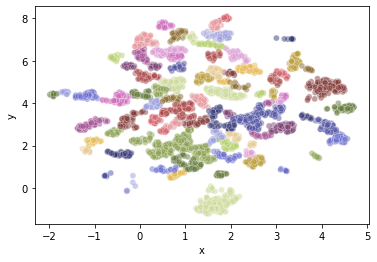

In [116]:
sns.scatterplot(x="x", y = "y", data = scatter_df[(scatter_df['cluster_labels']!=-1)], hue = 'cluster_labels', palette = 'tab20b',legend = False, alpha = 0.5)

## TOP TWEETS

In [117]:
scatter_df['prob'] = clusterer.probabilities_

In [118]:
df_clusters = []
for idx, grp in scatter_df[(scatter_df['cluster_labels']!=-1)].groupby('cluster_labels'):
    sorted_grp = grp.sort_values(by='prob',ascending = False)
    print('Top Tweets for Cluster {} with probabilities {}'.format(idx,sorted_grp['prob'].tolist()[:10]))
    print(sorted_grp['tweets'].tolist()[:10])
    print('-----------------------------------------------------------------')
    
    n = sorted_grp.shape[0]
    df_t = pd.DataFrame()
    df_t['cluster_id'] = [idx]*n
    df_t['tweet'] = sorted_grp['tweets'].tolist()
    df_t['probability'] = sorted_grp['prob'].tolist()
    df_t['screen_name'] = sorted_grp['screen_name'].tolist()
    df_clusters.append(df_t)

Top Tweets for Cluster 0 with probabilities [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
['देश तोड़ने वालों पर नहीं देश जोड़ने वालों पर मध्यप्रदेश की कांग्रेस सरकार ने केस दर्ज किया है जिन्होंने तिरंगा यात्रा निकाली थी छपाकनाथ', 'उत्तरप्रदेश के मुख्यमंत्री दिल्ली चुनाव में प्रचार करने क्या गए अंधभक्तो ने सरकारी हॉस्पिटल पर ही कब्ज़ा कर लिया 😊 दिल्ली_में_योगी_की_दहाड़ शाहीन_बाग_बचाएगा_संविधान दिल्ली_की_मालिक_जनता', 'छत्तीसगढ़ राजस्थान और मध्यप्रदेश सरकार में छपाक टेक्स फ्री हमारे up मे कब होगी myogiadityanath जी आप भी करो जनता धन्यवाद करेगी bhupeshbaghel ashokgehlot51 officeofknath incchhattisgarh incrajasthan incmp rahulgandhi priyankagandhi deepikapaducone छपाक_जरूर_देखेंगे', 'हमें आपकी फिक्र है लॉकडाउन के कारण अन्य राज्यों के जो भी मजदूर भाई बहन मध्यप्रदेश में फंसे हुए हैं राज्य सरकार उनके भोजन आवास व दवाईयों की समुचित व्यवस्था कर रही है। कोरोना संकट से जीतेंगे हम श्रमिकों के हित में सरकार उठा रही कदम mpfightscorona jansamparkmp', '【live video】 जनता खुश उत्तरप्रदेश पुलिस ने नही

Top Tweets for Cluster 85 with probabilities [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
['i repeat amitshah amp his party are the real amp only credible tukdetukdegang  this man cannot utter a healing word he doesnt know about healing words all he can speak about is what is abrasive amp divisive caanrcnpr caanrcnpr caanrcprotests ', 'आखिर शाहीन_बाग_की_बिकाऊ_औरते क्यों लड़ गईं कोई लिबरल बताएगा क्या 🤔', 'करुणामय मां को भूखी प्यासी कमरे में बंद कर बहू और बेटा निकले दिल्ली के शाहीन बाग में मौज मस्ती करने 10 दिन से कमरे में बंद थी बुजुर्ग महिला अलीगढ़ मोहल्ला शेखान अपर कोट का यह विडियो जरूर देखें शाहीन_बाग_हारेगा_देश_जितेंगा', 'इसे कहते है दिमाग मोदी जी ने शाहीन बाग के आवारा लोगो को रोजगार भी दे दिया और सैलरी भी कांग्रेस से दिलवा रहे हैं। 😆😆 shaheenbaghtruth', 'she is no more शाहीनबाग में प्रदर्शन कर रहे लोगों कुछ तो शर्म करो इस मासूम बची की होयी ठंड की वजह से होयी मौत 😡कुछ तो शर्म कर लेते इस मासूम बची को क्या पता क्या caa ओर kya nrc😡 shaheenbaghworry shaheenbaghkasach shaheenbaghpr

In [119]:
pd.concat(df_clusters, ignore_index = True).to_excel("./data/caanrc_clusters_tweets.xlsx", index = None)